In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from utility import util, analysis_parameters as ap
import dask
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

chunks = {"time":1000, "Xdim":1000}
chunks3D = {"time":500, "Xdim":1000, "lev":10}

mean=False
single=True

In [2]:
if mean:
    othres0=200
    athres0=0.6

    # open files
    clf_submean0 = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clfmean_alb0.6_olr200_20200130-20200228.nc", chunks=chunks3D).cltotal.mean(dim=["time","lat","lon"]).values
    clw_submean0 = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clwmean_alb0.6_olr200_20200130-20200228.nc", chunks=chunks3D).clw.mean(dim=["time","lat","lon"]).values

    print(clf_submean0.shape, clw_submean0.shape)

    # open files
    clf_subcf0 = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clfcf_alb0.6_olr200_20200130-20200228.nc", chunks=chunks3D).cltotal.mean(dim=["time","lat","lon"]).values
    clw_subcf0 = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clwcf_alb0.6_olr200_20200130-20200228.nc", chunks=chunks3D).clw.mean(dim=["time","lat","lon"]).values

    print(clf_submean0.shape, clw_submean0.shape)
    
    # get height
    z = xr.open_dataset(ap.get_fldmean_file("GEOS","TWP","zg"), chunks=chunks3D).zg.mean(axis=(0,2,3)).compute()
    z.shape

    # plot cloud content and cloud fraction for high OLR, high albedo case
    fig, [ax,ay] = plt.subplots(1,2,figsize=(8,6), sharey=True)
    ax.plot(clf_submean0, z, label="total")
    ax.plot(clw_submean0, z, label="liquid")
    ax.plot(clf_submean0-clw_submean0, z, label="ice")
    ax.set_ylim([0,20000])
    ax.legend()
    ay.plot(clf_subcf0, z, label="total")
    ay.plot(clw_subcf0, z, label="liquid")
    ay.plot(clf_subcf0-clw_subcf0, z, label="ice")
    ay.legend()
    ax.fill_between([-1e-2,1],14000,18000,color="k",alpha=0.2)
    ay.fill_between([-1e-2,1],14000,18000,color="k",alpha=0.2)
    ax.set_title("cloud condensate GEOS TWP\nOLR > {} and alb > {}".format(othres0, athres0))
    ax.set_xlabel("kg/kg")
    ay.set_title("cloud fraction GEOS TWP\nOLR > {} and alb > {}".format(othres0, athres0))
    ay.set_xlim([0,0.4])
    ax.set_xlim([0,0.0002])
    ax.grid()
    ay.grid()
    plt.savefig("../plots/TWP/GEOS_congestus_{}_{}.png".format(athres0, othres0))
    plt.show()

In [3]:
if mean:
    athres, othres = 0.6, 100

    # open files
    clf_submean = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clfmean_alb0.6_olr100_20200130-20200228.nc", chunks=chunks3D).cltotal.mean(dim=["time","lat","lon"]).values
    clw_submean = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clwmean_alb0.6_olr100_20200130-20200228.nc", chunks=chunks3D).clw.mean(dim=["time","lat","lon"]).values

    clf_submean.shape, clw_submean.shape

    # open files
    clf_subcf = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clfcf_alb0.6_olr100_20200130-20200228.nc", chunks=chunks3D).cltotal.mean(dim=["time","lat","lon"]).values
    clw_subcf = xr.open_dataset("/scratch/b/b380883/TWP_3D_GEOS_clwcf_alb0.6_olr100_20200130-20200228.nc", chunks=chunks3D).clw.mean(dim=["time","lat","lon"]).values

    clf_submean.shape, clw_submean.shape
    #get height
    z = xr.open_dataset(ap.get_fldmean_file("GEOS","TWP","zg"), chunks=chunks3D).zg.mean(axis=(0,2,3)).compute()
    z.shape
    
    #plot cloud content and cld frac for low OLR, high albedo case
    fig, [ax,ay] = plt.subplots(1,2,figsize=(8,6), sharey=True)
    ax.plot(clf_submean, z, label="total")
    ax.plot(clw_submean, z, label="liquid")
    ax.plot(clf_submean-clw_submean, z, label="ice")
    ax.set_ylim([0,20000])
    ax.legend()
    ay.plot(clf_subcf, z, label="total")
    ay.plot(clw_subcf, z, label="liquid")
    ay.plot(clf_subcf-clw_subcf, z, label="ice")
    ay.legend()
    ax.fill_between([-1e-2,1],14000,18000,color="k",alpha=0.2)
    ay.fill_between([-1e-2,1],14000,18000,color="k",alpha=0.2)
    ax.set_title("cloud condensate GEOS TWP\nOLR < {} and alb > {}".format(othres, athres))
    ax.set_xlabel("kg/kg")
    ay.set_title("cloud fraction GEOS TWP\nOLR < {} and alb > {}".format(othres, athres))
    ay.set_xlim([0,0.4])
    ax.set_xlim([0,0.0002])
    ax.grid()
    ay.grid()
    plt.savefig("../plots/TWP/GEOS_congestus_{}_{}.png".format(athres, othres))
    plt.show()

In [4]:
if mean:
    #plot diff b/w high and low OLR with high albedo
    fig, [ax,ay] = plt.subplots(1,2,figsize=(8,6), sharey=True)
    ax.plot(clf_submean-clf_submean0, z, label="total")
    ax.plot(clw_submean-clw_submean0, z, label="liquid")
    ax.plot((clf_submean-clw_submean)-(clf_submean0-clw_submean0), z, label="ice")
    ax.set_ylim([0,20000])
    ax.legend()
    ay.plot(clf_subcf-clf_subcf0, z, label="total")
    ay.plot(clw_subcf-clw_subcf0, z, label="liquid")
    ay.plot((clf_subcf-clw_subcf)-(clf_subcf-clw_subcf), z, label="ice")
    ay.legend()
    ax.fill_between([-1e-2,1],14000,18000,color="k",alpha=0.2)
    ay.fill_between([-1e-2,1],14000,18000,color="k",alpha=0.2)
    ax.set_title("cloud condensate GEOS TWP\nlow OLR - high OLR (alb>{})".format(athres))
    ax.set_xlabel("kg/kg")
    ay.set_title("cloud fraction GEOS TWP\nlow OLR - high OLR (alb>{})".format(athres))
    ay.set_xlim([-0.1,0.1])
    ax.set_xlim([-0.00005,0.00005])
    ax.grid()
    ay.grid()
    plt.savefig("../plots/TWP/GEOS_congestus_high-lowOLR_{}.png".format(athres))
    plt.show()

[########################################] | 100% Completed |  0.1s
210 2020-02-01T04:30:00.000000000 14 local time
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s


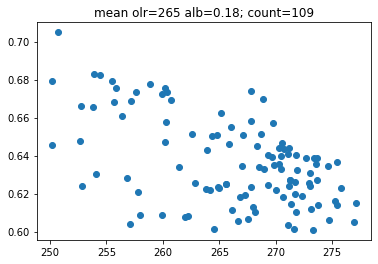

congi...
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
...done.
0
[########################################] | 100% Completed |  0.1s
1
[########################################] | 100% Completed |  0.1s
2
[########################################] | 100% Completed |  0.1s
3
[########################################] | 100% Completed |  0.1s
4
[########################################] | 100% Completed |  0.1s
5
[########################################] | 100% Completed |  0.1s
6
[########################################] | 100% Completed |  0.1s
7
[#############

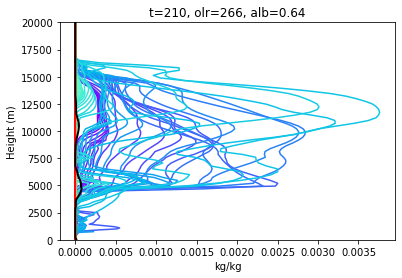

In [20]:
if single:
    othres, athres = 250, 0.6
    # get total cloud content, albedo and olr
    q  = xr.open_dataset("/work/bb1153/b380883/TWP/TWP_3D_GEOS_cltotal_20200130-20200228.nc", chunks=chunks3D).cltotal
    alb = xr.open_dataset("/work/bb1153/b380883/TWP/TWP_GEOS_alb_20200130-20200228.nc", chunks=chunks).rsut
    olr = xr.open_dataset("/work/bb1153/b380883/TWP/TWP_GEOS_rlut_20200130-20200228.nc", chunks=chunks).rlut
    z = xr.open_dataset(ap.get_fldmean_file("GEOS","TWP","zg"), chunks=chunks3D).zg.mean(axis=(0,2,3)).compute()

    i = np.random.randint(0,720)
    hr = (int(olr.time.dt.hour[i])+10)%24
    print(i, olr.time[i].values, hr, "local time")
    if hr<9 or hr>20:
        raise Exception("nighttime")
    albi = alb[i].where((alb[i]>=athres)&(olr[i]>=othres), drop=True)
    olri = olr[i].where((alb[i]>=athres)&(olr[i]>=othres), drop=True)
    
    plt.scatter(olri, albi)
    ct = int(olri.count())
    plt.title("mean olr={} alb={:0.2g}; count={}".format(int(olr[i].mean()), alb[i].mean().values, ct))
    plt.show()
    print("congi...")
    q_congi = q[i].where((alb[i]>athres)&(olr[i]>othres), drop=True)
    print("...done.")
    
    cmap = cm.get_cmap("rainbow")
    for k in range(ct):
        print(k)
        plt.plot(q[i,:,k], z.values, color=cmap(k/ct))
    plt.plot(q_congi.mean(dim=["Xdim"]), z, color="k", linewidth=2)
    plt.ylim([0,20000])
    plt.xlabel("kg/kg")
    plt.ylabel("Height (m)")
    plt.title("t={}, olr={}, alb={:.2g}".format(i,int(olri.mean().values), (albi.mean().values)))
    plt.show()

In [9]:
q_congi = q[i].where((alb[i]>athres)&(olr[i]>othres), drop=True)
print(q_congi.shape)

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
(181, 74)


In [70]:
np.cumsum(q[i,:,j])[120].values>1e-4

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s


True

# Zero array

Generate an xarray with zeros for each model and save as netcdf



In [6]:
import xarray as xr
import numpy as np
from utility import analysis_parameters as ap

In [8]:
# NICAM
cl = xr.open_dataset(ap.get_file("NICAM","TWP_3D","cltotal")).cltotal
da = xr.DataArray(np.zeros((240,284,284)), dims=["time","lat","lon"], coords={"time":cl.time, "lat":cl.lat, "lon":cl.lon})
ds = xr.Dataset({"cldtop":da})
ds
# ds.to_netcdf("/work/bb1153/b380883/TWP/TWP_NICAM_zeros.nc")

<xarray.Dataset>
Dimensions:  (time: 240, lat: 284, lon: 284)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30T03:00:00 ... 2020-02-29
  * lat      (lat) float64 -4.975 -4.939 -4.904 -4.869 ... 4.904 4.939 4.975
  * lon      (lon) float64 143.0 143.1 143.1 143.1 ... 152.9 152.9 152.9 153.0
Data variables:
    cldtop   (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0